In [1]:
import os.path
import rmgpy
from rmgpy.data.rmg import RMGDatabase
from rmgpy.chemkin import loadSpeciesDictionary
from rmgpy.molecule.resonance import generateAromaticResonanceIsomers

In [2]:
temperature = 298

In [3]:
databasePath = rmgpy.settings['database.directory']

database1 = RMGDatabase()
database1.load(
    path = databasePath,
    thermoLibraries = [],
    reactionLibraries = [],
    seedMechanisms = [],
    kineticsFamilies = 'none'
    )

database2 = RMGDatabase()
database2.load(
    path = databasePath,
    thermoLibraries = ['PAHLibrary'],
    reactionLibraries = [],
    seedMechanisms = [],
    kineticsFamilies = 'none'
    )

In [4]:
speciesList1 = loadSpeciesDictionary('/home/mjliu/Documents/PAHThermo/species_dictionary.txt')
speciesList2 = loadSpeciesDictionary('/home/mjliu/Documents/PAHThermo/species_dictionary.txt')

In [5]:
for label, spec in speciesList1.iteritems():
    #amol = generateAromaticResonanceIsomers(spec.molecule[0])
    #spec.thermo = database1.thermo.estimateThermoViaGroupAdditivity(amol[0])
    spec.thermo = database1.thermo.getThermoData(spec)
    spec.h = spec.thermo.getEnthalpy(temperature) / 1000
    spec.s = spec.thermo.getEntropy(temperature)

In [6]:
#for label, spec in speciesList1.iteritems():
#    print label + ' : ' + str(len(spec.molecule))

In [6]:
for label, spec in speciesList2.iteritems():
    spec.thermo = database2.thermo.getThermoData(spec)
    spec.h = spec.thermo.getEnthalpy(temperature) / 1000
    spec.s = spec.thermo.getEntropy(temperature)

In [7]:
labels = []
gavEnthalpy = []
gavEntropy = []
calcEnthalpy = []
calcEntropy = []

for label in speciesList1.keys():
    labels.append(label)
    
    gavEnthalpy.append(speciesList1[label].h)
    gavEntropy.append(speciesList1[label].s)

    calcEnthalpy.append(speciesList2[label].h)
    calcEntropy.append(speciesList2[label].s)

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

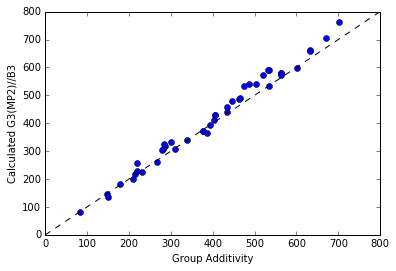

In [9]:
plt.plot(gavEnthalpy, calcEnthalpy, 'bo')
plt.plot([0, 800], [0, 800], 'k--')
plt.xlabel('Group Additivity')
plt.ylabel('Calculated G3(MP2)//B3')
plt.show()

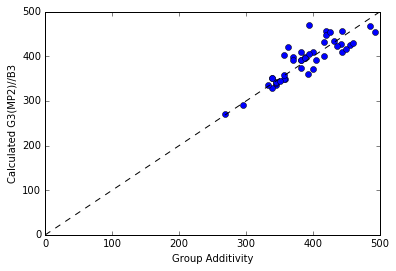

In [10]:
plt.plot(gavEntropy, calcEntropy, 'bo')
plt.plot([0, 500], [0, 500], 'k--')
plt.xlabel('Group Additivity')
plt.ylabel('Calculated G3(MP2)//B3')
plt.show()

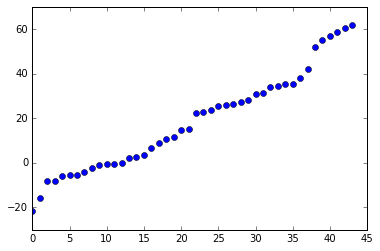

In [11]:
hDiff = np.subtract(calcEnthalpy,gavEnthalpy)
plt.plot(np.sort(hDiff),'bo')
plt.show()

In [13]:
#index = np.where(hDiff<-200)[0]
#print labels[index[0]]

In [16]:
print np.mean(np.absolute(np.subtract(calcEnthalpy,gavEnthalpy)))
print np.mean(np.absolute(np.subtract(calcEntropy,gavEntropy)))

22.3028974895
19.0227561352


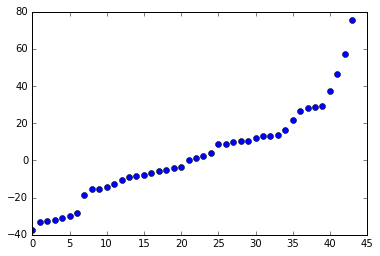

In [13]:
sDiff = np.subtract(calcEntropy,gavEntropy)
plt.plot(np.sort(sDiff),'bo')
plt.show()

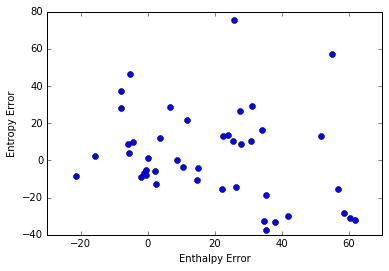

In [14]:
plt.plot(hDiff, sDiff, 'bo')
plt.xlabel('Enthalpy Error')
plt.ylabel('Entropy Error')
plt.show()

In [20]:
indices = np.where(sDiff>40)[0]
for index in indices:
    print labels[index]
    #print speciesList1[labels[index]].thermo.comment

A4p
A5
A4p-


In [21]:
indices = np.where(np.logical_and(sDiff<40,sDiff>20))[0]
for index in indices:
    print labels[index]
    #print speciesList1[labels[index]].thermo.comment

A4c
A3p-
A4t
A3pC2H
A3p
A3a


In [22]:
indices = np.where(np.logical_and(sDiff<20,sDiff>-20))[0]
for index in indices:
    print labels[index]
    #print speciesList1[labels[index]].thermo.comment

A1C2H-4
A1C2H-3
A1C2H-2
A1C2H
A2C2HA
A2C2HB
A1
A3R5-
A2
A1-
A3pC2H2
P2
i-A1C2H2
A2-2
A2-1
A2C2HB-
A1(C2H)2
A2C2H2
A2C2H3
P2-
A2C2HA-
n-A1C2H2
A2(C2H)2
A3R5
A1C2H3
A4R5
A3R5C2H
A1C2H3-2


In [18]:
indices = np.where(sDiff<-20)[0]
for index in indices:
    print labels[index]
    #print speciesList1[labels[index]].thermo.comment

A2R5(C2H)2
A2R5C2H
A2R5C2H3
A2R5-
A2R5C2H2
A2R5C2H-
A2R5
